In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import cv2
import torch
from PIL import Image

from ultralytics import YOLO
from ultralytics.yolo.utils import ROOT, SETTINGS

In [24]:
import ultralytics
ultralytics.__version__

'8.0.87'

In [3]:
import os

In [4]:
ROOT

PosixPath('/Users/jeongmin/opt/anaconda3/envs/vir/lib/python3.10/site-packages/ultralytics')

In [5]:
Path(SETTINGS['weights_dir'])

PosixPath('weights')

In [6]:
MODEL  = '../ultralytics/yolov8n-face.pt'
DIRS = '../../worst_frame_eye'

#### 이미지 여러개

In [17]:
## getcoord func
def getcoord(output):
    total_ = []
    for result in output:
        detection_count = result.boxes.shape[0]
        if detection_count == 1:
            keypoints = result.keypoints[0].numpy() 
            coords = [(x,y) for x,y,z in keypoints]
            total_.append(coords[:2])
        else:
            print('none')
    return total_

In [22]:
#define model
model = YOLO(MODEL)

p_name = os.listdir(DIRS)
p_name = [d for d in p_name if not d.startswith ('.')] #.DS_Store 제외



for p in p_name:
    cam = os.listdir(DIRS + "/"+ p)
    cam = [d for d in cam if not d.startswith ('.')] #.DS_Store 제외


    for c in cam :
        root = DIRS + "/"+ p +"/"+ c
        open_seq = os.listdir(root+"/open/")
        close_seq = os.listdir(root+ "/close/")
         
        open_seq = [d for d in open_seq if not d.startswith ('.')] #.DS_Store 제외
        close_seq = [d for d in close_seq if not d.startswith ('.')] #.DS_Store 제외


        for o in open_seq:
            imgs = os.listdir(root+"/open/"+o)
            imgs.sort()
            im_li = [root+"/open/"+o+"/"+ i for i in imgs] #13개 이미지 한꺼번에 input
            output = model(source=im_li)  
            
            final_coord = getcoord(output) #눈 좌표 가져옴
            
            if len(final_coord) != 13:
                print(im_li)
                continue
            
            else: #그림
                
                for img,coords in zip(imgs,final_coord):
                    im = cv2.imread(root+"/open/"+o+"/"+ img)

#                     for i in coords:
                        
#                         x = int(i[0])
#                         y = int(i[1])
#                         cv2.circle(im, (x,y), 4, (255, 0, 255), 4)
                    #print((coords[0][0],coords[0][1]))
                    coords = [(int(x[0]),int(x[1])) for x in coords]
                    cv2.circle(im, (coords[0][0],coords[0][1]), 4, (255, 0, 0), 4) #오
                    cv2.circle(im, (coords[1][0],coords[1][1]), 4, (0, 0, 255), 4) #왼
                    cv2.imwrite(f'../../yolov8/{p}_{c}_c_{img}',im)
                    #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
            break
                      
            
        break

            
#         for o in close_seq:
#             imgs = os.listdir(root+"/close/"+o)
#             imgs.sort()
#             im_li = [root+"/close/"+o+"/"+ i for i in imgs] #13개 이미지 한꺼번에 input
#             output = model(source=im_li)  
            
#             final_coord = getcoord(output) #눈 좌표 가져옴
            
#             if len(final_coord) != 13:
#                 print(im_li)
#                 continue
            
#             else: #그림
                
#                 for img,coords in zip(imgs,final_coord):
#                     im = cv2.imread(root+"/close/"+o+"/"+ img)

#                     for i in coords:
#                         x = int(i[0])
#                         y = int(i[1])
#                         cv2.circle(im, (x,y), 4, (0, 255, 255), 4)
#                     cv2.imwrite(f'../../yolov8/{p}_{c}_o_{img}',im)
#                     #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
#             break
    
    


0: 480x640 1 face, 1: 480x640 1 face, 2: 480x640 1 face, 3: 480x640 1 face, 4: 480x640 1 face, 5: 480x640 1 face, 6: 480x640 1 face, 7: 480x640 1 face, 8: 480x640 1 face, 9: 480x640 1 face, 10: 480x640 1 face, 11: 480x640 1 face, 12: 480x640 1 face, 3314.6ms
Speed: 3.0ms preprocess, 255.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 face, 1: 480x640 1 face, 2: 480x640 1 face, 3: 480x640 1 face, 4: 480x640 1 face, 5: 480x640 1 face, 6: 480x640 1 face, 7: 480x640 1 face, 8: 480x640 1 face, 9: 480x640 1 face, 10: 480x640 1 face, 11: 480x640 1 face, 12: 480x640 1 face, 2933.7ms
Speed: 1.6ms preprocess, 225.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 face, 1: 480x640 1 face, 2: 480x640 1 face, 3: 480x640 1 face, 4: 480x640 1 face, 5: 480x640 1 face, 6: 480x640 1 face, 7: 480x640 1 face, 8: 480x640 1 face, 9: 480x640 1 face, 10: 480x640 1 face, 11: 480x640 1 face, 12: 480x640 1 face, 1899.8ms
Speed: 2.2ms preprocess,

In [87]:
len(output)

13

In [90]:
for result in output:

    detection_count = result.boxes.shape[0]
    if detection_count == 1:
        keypoints = result.keypoints[0].numpy() 
        print(keypoints)
    else:
        print('none')

[[     318.21      251.35     0.88698]
 [     372.42      247.19     0.88795]
 [      346.3      272.49     0.92372]
 [      327.9      313.61     0.91153]
 [     372.19      310.15     0.91498]]
[[     318.42      251.53     0.88561]
 [     372.08      247.19     0.88604]
 [     346.07      272.39     0.92321]
 [     328.35      313.53     0.91225]
 [     372.16      309.92     0.91533]]
[[      318.1      251.36     0.88478]
 [     372.08      246.77     0.88614]
 [     345.97      272.17     0.92321]
 [     328.28      313.67     0.91177]
 [     372.38      309.85     0.91547]]
[[     318.19      251.46     0.88659]
 [     371.94      246.93     0.88716]
 [     345.87      272.72     0.92336]
 [     328.34      313.63      0.9116]
 [     372.22      309.86     0.91463]]
[[     318.28      251.59     0.88712]
 [        372      247.21     0.88732]
 [     345.93      272.29     0.92351]
 [     328.27      313.65     0.91213]
 [     372.12         310     0.91497]]
[[     318.83      2

#### 이미지 1개

In [25]:
#MODEL = Path(SETTINGS['weights_dir']) / 'yolov8n.pt'
MODEL  = '../ultralytics/yolov8n-face.pt'
#CFG = 'yolov8n.yaml'
#SOURCE = ROOT / 'assets/bus.jpg'
SOURCE = '../x/img_890.jpg'

In [26]:
model = YOLO(MODEL)
img = Image.open(str(SOURCE))
output = model(source=img)  # PIL


0: 480x640 1 face, 241.5ms
Speed: 6.3ms preprocess, 241.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [31]:
output

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: tensor([[[327.9095, 132.4993,   0.9030],
          [378.4464, 117.9197,   0.9217],
          [380.0398, 165.1713,   0.9265],
          [342.3429, 193.2245,   0.8676],
          [381.3272, 181.9656,   0.8888]]])
 keys: ['boxes', 'keypoints']
 masks: None
 names: {0: 'face'}
 orig_img: array([[[255, 253, 253],
         [255, 253, 253],
         [255, 253, 253],
         ...,
         [115, 123, 122],
         [123, 129, 128],
         [123, 129, 128]],
 
        [[255, 253, 253],
         [255, 253, 253],
         [255, 253, 253],
         ...,
         [100, 108, 107],
         [115, 121, 120],
         [109, 115, 114]],
 
        [[255, 253, 253],
         [255, 253, 253],
         [255, 253, 253],
         ...,
         [ 79,  87,  86],
         [ 85,  91,  90],
         [ 76,  82,  81]],
 
        ...,
 
        [[170, 168, 167],
         [170, 168, 167]

In [32]:
for result in output:


    print(result.path)

../x/img_890.jpg


In [62]:
coords = [(x,y) for x,y,z in keypoints]
coords

[(327.90955, 132.49925),
 (378.44638, 117.9197),
 (380.03976, 165.17126),
 (342.34286, 193.22446),
 (381.32724, 181.96564)]

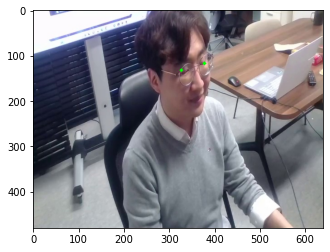

In [58]:
im = cv2.imread(SOURCE)

for i in coords[:2]:
    x = int(i[0])
    y = int(i[1])
    cv2.circle(im, (x,y), 2, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))